In [37]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/titanic/train.csv
/kaggle/input/titanic/test.csv
/kaggle/input/titanic/gender_submission.csv


In [67]:
# Load the data 
train_data = pd.read_csv("/kaggle/input/titanic/train.csv")
test_data = pd.read_csv("/kaggle/input/titanic/test.csv")
# Make a dataframe
train_df = pd.DataFrame(train_data)
test_df = pd.DataFrame(test_data)

# Print out the dataframe
display(train_df.head())

# Show the test data 
#train_df[["Sex", "Age"]].head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [71]:
#Create new dataframe with Nan values replaced by the mean 
train_df_missing = train_df
train_df_missing.fillna({"Age" : train_df_missing["Age"].mean()}, inplace=True)

#Show the sums of Nan values for each variable of train_df and train_df_missing
display(train_df.isna().sum())
display(train_df_missing.isna().sum())


PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [81]:
# One hot encoding on the easy categorical features such as Sex and Embarked

from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

categorical_features = ["Sex", "Embarked"]
one_hot = OneHotEncoder()
transformer = ColumnTransformer([("one_hot", one_hot, categorical_features)],
                                  remainder="passthrough")
transformed = transformer.fit_transform(train_df_missing[["Pclass",
                                        "Sex","Age", "SibSp", "Parch", "Fare", "Embarked"]])   
train_df_missing_trans = pd.DataFrame(transformed)

train_df_missing_trans

,0,1,2,3,4,5,6,7,8,9,10
0,0.0,1.0,0.0,0.0,1.0,0.0,3.0,22.000000,1.0,0.0,7.2500
1,1.0,0.0,1.0,0.0,0.0,0.0,1.0,38.000000,1.0,0.0,71.2833
2,1.0,0.0,0.0,0.0,1.0,0.0,3.0,26.000000,0.0,0.0,7.9250
3,1.0,0.0,0.0,0.0,1.0,0.0,1.0,35.000000,1.0,0.0,53.1000
4,0.0,1.0,0.0,0.0,1.0,0.0,3.0,35.000000,0.0,0.0,8.0500
...,...,...,...,...,...,...,...,...,...,...,...
886,0.0,1.0,0.0,0.0,1.0,0.0,2.0,27.000000,0.0,0.0,13.0000
887,1.0,0.0,0.0,0.0,1.0,0.0,1.0,19.000000,0.0,0.0,30.0000
888,1.0,0.0,0.0,0.0,1.0,0.0,3.0,29.699118,1.0,2.0,23.4500
889,0.0,1.0,1.0,0.0,0.0,0.0,1.0,26.000000,0.0,0.0,30.0000


891 891


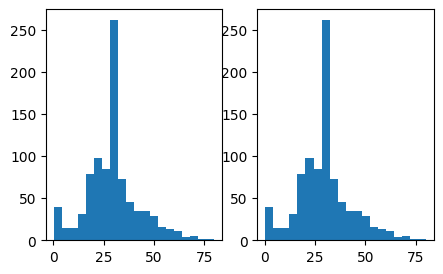

In [55]:
#Plotting histograms of the feature variables
fig, ax = plt.subplots(nrows=1, ncols=2, 
                       figsize = (5,3))

print(len(train_df["Age"]), len(train_df_missing["Age"]))

ax[0].hist(train_df["Age"], bins=20);

ax[1].hist(train_df_missing["Age"], bins=20);



In [84]:
#First RandomForestClassifier 

#Import randomforestclassifier
from sklearn.ensemble import RandomForestClassifier

# setup the random seed
np.random.seed(42)


#Split up into feature variables and target variables
x_train = train_df_missing_trans
y_train = train_df_missing["Survived"]


#Instantiate the classifier
clf = RandomForestClassifier(n_estimators=100)
clf.fit(x_train, y_train)

#Score the classifier
clf.score(x_train, y_train)


0.9820426487093153

In [ ]:
clf.predict()